<div dir="rtl" align="center">

به نام خداوند بخشنده مهربان

<h1>
پروژه پایانی جبر خطی
</h1>

حمیدرضا ربیعی، مریم رمضانی

</div>

<div dir="rtl">

نام و نام‌خانوادگی:‌ پارمیدا جوادیان 

شماره دانشجویی: 99101365

</div>

<div dir="rtl">
    <h1>
        چهره‌های ویژه
    </h1>
</div>

<div dir="rtl" style="font-size:18px"> 
    در الگوریتم‌های تشخیص چهره، درون عکس‌ها به دنبال تشخیص خصوصیت‌های خاص عکس بودند. به طور مثال چشم، بینی و ...
     که می‌توانست حاکی از وجود چهره در عکس باشند. واضح است که چنین روش‌هایی هزینه‌بر و در موارد زیادی نادقیق هستند.
    <br/>
    <br/>
    در این پروژه به دنبال پیاده سازی روشی هستیم که این تشخیص را به گونه‌ای دیگر انجام می‌دهد.
    در این روش مانند روش قبل به دنبال پیدا کردن مشخصه‌هایی هستیم که یک چهره را تشخیص میدهند ، اما این مشخصه‌ها را با روش دیگری می‌خواهیم پیاده کنیم.
</div>

## Load Data (10 points)



<br/>

<div dir="rtl" style="font-size:18px">
    قبل از اینکه درباره پیاده‌سازی این الگوریتم صحبت کنیم لازم است داده‌هایی که مورد استفاده قرار می‌دهیم را داشته باشیم.
    داده‌های مورد نظر در زیپ مربوطه همراه این نوتبوک قرار گرفته‌است.
    <br/>
    دقت کنید که این دیتاست شامل تصاویر مربوط به چهره 200 فرد است.
    هر کدام از افراد دو عکس یکی حالت طبیعی و یکی خندان دارند.
    پس در کل 400 عکس داریم.
    ابتدا تمام عکس‌ها را لود کنید و داشته باشید که در ادامه به آن‌ها نیاز پیدا می‌کنید.
    <br/>
    <br/>
    در نهایت برای این که مطمئن شوید که دیتا را درست لود کرده‌اید،
    به طور رندوم 5 تا از این چهره‌ها را در دو حالت خندان و عادی نمایش دهید. برای اینکار میتوانید از تابع imshow از لایبرری matplotlib استفاده کنید.
    <br/>
</div>

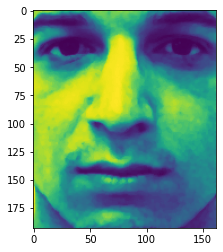

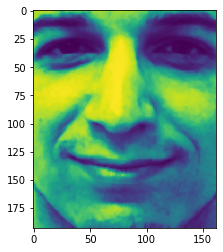

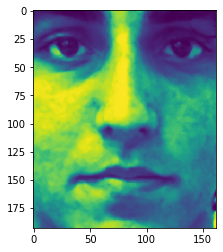

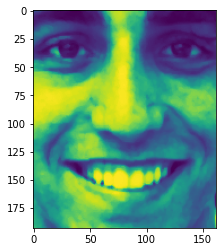

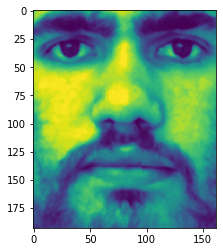

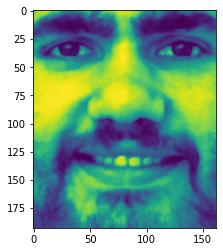

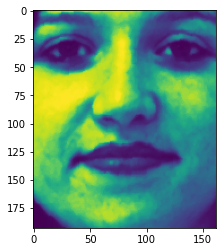

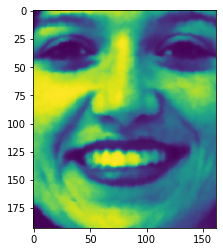

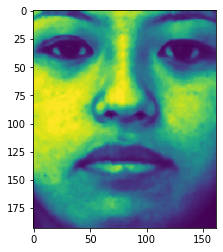

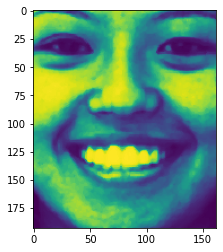

In [1]:
import random
import matplotlib.pyplot as plt

images = list()
for i in range(200):
    images.append(plt.imread("data/"+
                             str(i+1)+"a.jpg"))
    images.append(plt.imread("data/"+
                             str(i+1)+"b.jpg"))
for i in range(5):
    n = random.randint(0,199)
    plt.figure()
    plt.imshow(images[2*n])
    plt.figure()
    plt.imshow(images[2*n+1])


<br/>
<div dir="rtl" style="font-size:18px">
حال فعلا تنها با عکس‌های چهره طبیعی کار داریم.
    190 تا عکس اول از آن را در نظر بگیرید
     هر کدام را به صورت یک وکتور تک بعدی $\Gamma_i$ در بیاورید.
     در نهایت ماتریس حاصل از داده‌ها که $\Gamma$ است
    را تشکیل دهید. دقت کنید که ستون $i$ ام این ماتریس
    $\Gamma_i$ است.
    <br/>
<div/>

In [2]:
import numpy as np
gamma = np.ndarray((len(images[0].flatten()),190),int)
for i in range(190):
    gammai = images[2 * i].flatten()
    gamma[:,i] = gammai
print(gamma)

[[254  65 129 ...  58  96 178]
 [252  52 104 ...  20  96 178]
 [252  32  95 ...  19  96 185]
 ...
 [ 65   0  53 ...   1   3 100]
 [ 70   0  53 ...   1   3 106]
 [ 70   0  55 ...   1   3 100]]


# PCA 
<br/>
<br/>

<div dir="rtl" style="font-size:18px">
 <br/>
    الگوریتم Principal Component Analysis یا همان PCA یک روش برای کاهش ابعاد داده‌ی موردنظر است که در حوزه یادگیری ماشین و علوم داده کاربرد فراوان دارد.
با کاهش ابعاد سادگی را افزایش داده و در عین حال همانگونه که انتظار می‌رود ورودی با کاهش دقت همراه خواهد شد. در الگوریتم PCA تلاش بر این است که در عین کاهش ابعاد، کمترین میزان اطلاعات را از دست بدهیم.
    پیشنهاد می‌شود قبل از انجام پروژه مطالعات بیشتری در رابطه با این الگوریتم داشته باشید.
<br/>
    <br/>
در ادامه‌ی بخش‌ها می‌خواهیم PCA را پیاده سازی کنیم.
گفتیم که برای تشخیص چهره‌ها به دنبال پیدا کردن مشخصه‌های خاص درون هر عکس هستیم. این مشخصه‌ها ممکن است ترکیبی از چند ویژگی درون عکس باشند، یا حتی ویژگی‌هایی 
    باشند که به طور طبیعی قادر به تشخیص آنها نیستیم.
    در اینجا با استفاده از الگوریتم PCA در تلاش برای پیدا کردن همچین ویژگی‌هایی هستیم.
    <br/>
    <br/>
با PCA قرار است کار زیر را انجام دهیم :
    <br/>
    <br/>
فرض کنید هر عکس به صورت یک آرایه دو بعدی $N\times M$ باشد ، بنابراین هر عکس را می‌توان با یک بردار به طول $N\times M$ نشان دهیم، پس در یک فضای $N\times M$ بعدی قرار دارد. فرض کنید $W$ فضایی باشد که تمامی عکس‌های صورت در آن قرار دارند ، اسم آن را Face Space بگذارید. در اینجا به دنبال پیدا کردن K بردار عمود بر هم هستیم که فضای $W$ را Span می‌کنند.
    <div/>

## Mean image (5 points)

<div dir="rtl" style="font-size:18px">
    
<div/>

<div dir="rtl" style="font-size:18px">
    در این قسمت برای نرمالایز کردن نیاز به 
    mean image
    داریم.
    آن را بدست آورید و تصویر آن را نمایش هم دهید.
    $$
    \Psi = \frac{1}{n}\sum_{i = 1}^{n} \Gamma_i
    $$
     در اینجا $n$ تعداد داده های شماست.
     دقت کنید فعلا کل کار ما بر روی 190 عکس چهره طبیعی است.
<div/>

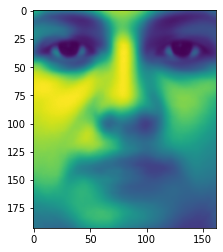

In [3]:
mean = np.mean(gamma,axis=1,keepdims=True)
plt.imshow(mean.reshape(images[0].shape))

## Cov Matrix (15 points)

<div dir="rtl" style="font-size:18px">
    
<div/>

<div dir="rtl" style="font-size:18px">
    در این قسمت باید ماتریس کوواریانس را به صورت زیر تعریف کنید :
    <br/>
    $$
    \Phi_i = \Gamma_i - \Psi
    $$
    <br/>
    $$
    A = [ \Phi_1 \Phi_2 \dots \Phi_n ]
    $$
    <br/>
    $$
    C = A A^T
    $$
    <br/>
    حال بردار ویژه های ماتریس $C$ به ترتیب بزرگی مقدار ویژه های متناظرشان ، Principal Components هایی هستند که ما می‌خواهیم.
    <br/>
    دقت کنید که ماتریس $C$ ماتریسی $(N \times M)\times (N \times M)$ می‌باشد ، سعی کنید روش بهینه ای برای پیدا کردن بردار ویژه های آن پیاده سازی کنید.
    به عنوان راهنمایی از 
    $A^T A$
    کمک بگیرید.
    <br/>
    مقدار این مقادیر ویژه را سورت کنید و درون یک نمودار نشان دهید. 
    <br/>
    بعد از سورت کردن مقدار ویژه‌ها ، بردار ویژه متناظر با 5 مقدار ویژه اول را بکشید.
    این بردار‌های ویژه را eigen face می‌نامیم.
    <br/>
     در نهایت با کمی مطالعه معیاری را انتخاب کنید و تعداد مورد نیاز از Principal Component
     ها از نظرتان را مشخص نمایید و آن تعداد بردار ویژه را انتخاب کنید.
     این عدد را K در نظر بگیرید.
     همچنین ماتریس شامل PCها را U در نظر بگیرید.
    <br/>
<div/>

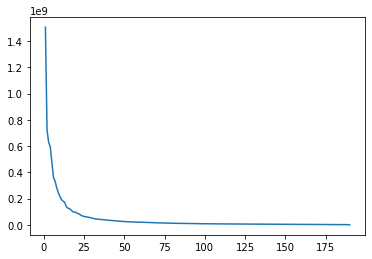

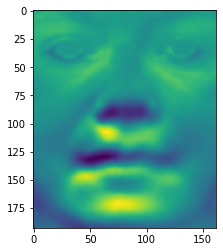

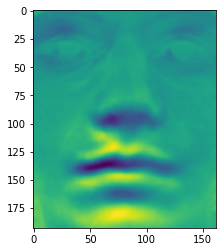

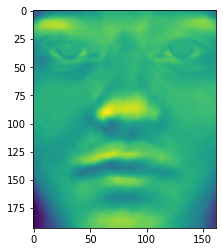

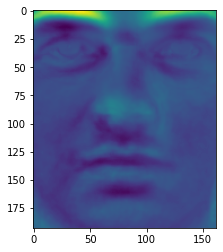

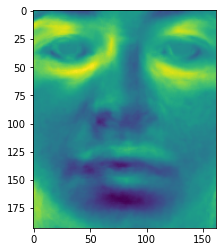

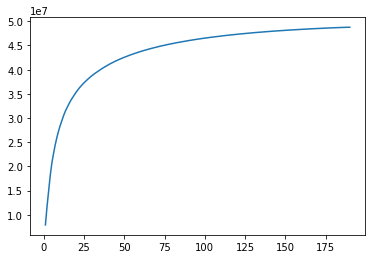

In [4]:
A = gamma - mean
ATA = np.transpose(A) @ A
eigenvalues,eigenvectors = np.linalg.eig(ATA)
indexes = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[indexes]
eigenvectors = eigenvectors[:,indexes]     
plt.plot(np.arange(1,191), eigenvalues)
U = A @ eigenvectors   
for i in range(190):
    if(np.sqrt(eigenvalues[i]) != 0):
        U[:,i] = U[:,i]/np.sqrt(eigenvalues[i])
for i in range(5):
    plt.figure()
    toShow = U[:,i].reshape(images[0].shape)
    plt.imshow(toShow)
plt.figure()
eigenvalues_mean = np.zeros(190)
sum_save = 0
for i in range(190):
    sum_save += eigenvalues[i]
    eigenvalues_mean[i] = sum_save/190
plt.plot(np.arange(1,191), eigenvalues_mean)

<div dir="rtl" style="font-size:18px">
    همانطور که مشاهده می‌شود، از حدود ۷۵امین مقدار ویزه به بعد، شیب نمودار ملایم شده پس می‌توان ۷۵ مقدار ویژه اول را به عنوان Principal Components در نظر گرفت.
<div/>

In [5]:
K = 75
new_U = U[:,:K]

## Reconstruction images (20 points)

<div dir="rtl" style="font-size:18px">
    در این قسمت قرار است که تابعی بنویسید که عکسی را به همراه
    Principal Components
    ‌های مورد نظر بگیرد و آن را دوباره با آن PC‌ها بازسازی کند.
    برای نحوه‌ی انجام این کار از روابط زیر کمک بگیرید.
    <br/>
    $$W = U^T(\Gamma - \Psi)$$
    $$rec = UW + \Psi$$
    <br/>
    دقت کنید که $\Gamma$
    این‌جا عکس ورودی است.
<div/>

<div dir="rtl" style="font-size:18px">
    
<div/>

In [6]:
def reconstruct_image(orig, pcs):
    """
    A function to reconstruct the original image with the given PCs
    Arguments
    orig - Original image to perform reconstruction on
    pcs  - The principal components to use for the reconstruction
    
    Returns
    recon - The reconstruction of the orig from pcs
    mse   - The Mean Squared Error of the recon with orig
    """
    orig = orig.flatten()[:, np.newaxis]
    W = np.transpose(pcs) @ (orig-mean)
    recon = (pcs @ W) + mean
    mse = ((orig - recon)**2).mean()
    recon = recon.reshape(images[0].shape)
    return recon, mse

<div dir="rtl" style="font-size:18px">
    )بخش ب(
    <br/>
    حال یکی از عکس‌های دیتاستی که تا الان روی آن کار کردیم )شامل 190 عکس طبیعی( را به صورت رندم انتخاب کنید.
    برای آن عکس به ازای تمام حالت‌های انتخاب K عملیات بازسازی را انجام دهید.
    <br/>
    کمترین و بیشترین MSE را به دست آورید.
    <br/>
    MSE را برای Kای که در قسمت قبل انتخاب کردید محاسبه نمایید.
    <br/>
    سپس نمودار 
    MSE-number of largest principal components
    را رسم کنید.
    <br/>
    در مرحله‌ی بعد برای یک عکس رندم دیگر از دیتاست، عکس اصلی را همراه عکس‌هایی که از بازسازی با در نظر گرفتن 
    5 انتخاب مختلف برای K که کل محدوده تعداد 
    eigen face‌ها را پوشش دهد، 
    رسم کنید.
    <br/>
    نتایج خود را از کار‌هایی که این بخش انجام دادید و از روی خروجی‌های بدست آمده شرح دهید.
<div/>

mse_max:  1595.829769957323
mse_min:  8.583655329807357e-24
K_mse:  81.0524680091122


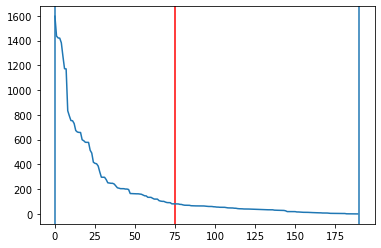

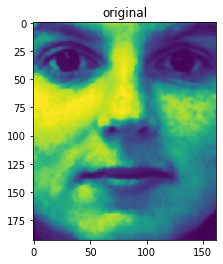

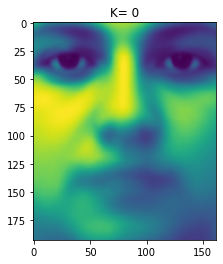

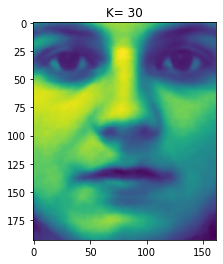

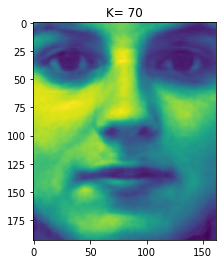

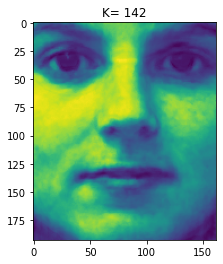

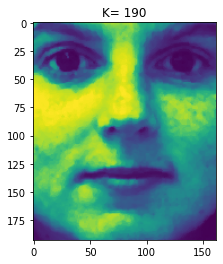

In [7]:
image = images[2*(random.randint(0,190))]
mses = list()
for i in range(1,191):
    recon , mse = reconstruct_image(image,U[:,:i])
    mses.append(mse)
mse_max = max(mses)
mse_min = min(mses)
K_mse = reconstruct_image(image,U[:,:K])[1]
print("mse_max: ",mse_max)
print("mse_min: ",mse_min)
print("K_mse: ",K_mse)
plt.axvline(x = K, color = 'r')
plt.axvline(x = 0)
plt.axvline(x = 190)
plt.plot(mses)

image = images[2*(random.randint(0,190))]
plt.figure()
plt.title("original")
plt.imshow(image)
Ks = [0,30,70,142,190]
for i in Ks:
    recon = reconstruct_image(image,U[:,:i])[0]
    plt.figure()
    plt.title("K= "+str(i))
    plt.imshow(recon)

<div dir="rtl" style="font-size:18px">
با استفاده از تعداد کمتری از principal componentها، اگرچه می‌توان تصویر را ساخت اما به ازای تعداد خیلی کم از آن‌ها، کیفیت و شباهت تصویر ساخته شده به تصویر اصلی خیلی کم بوده و هرچه تعداد بیشتری از pcها را انتخاب کنیم، تصویر ساخته شده به تصویر واقعی نزدیک‌تر شده و کیفیت آن بیشتر می‌شود. این اتفاق به این علت می‌افتد که ما بردارهای ویژه را بر حسب مقادیر ویژه متناظر با آن‌ها به طور نزولی مرتب کردیم و می‌دانیم در ماتریس کوواریانس، بزرگترین مقادیر ویژه بیشترین واریانس را دارند پس با این کار، بهترین تقریب به ازای تعداد مشخص از pcها زده شده، که این موضوع در نمودار mse ها هم مشخص است.
    <div/>

##  Smiling  images (10 points)

<div dir="rtl" style="font-size:18px">
    حال این بار تمام کار‌هایی که در بخش قبل )بخش ب( انجام دادید را تکرار کنید. 
    ولی این بار به جای عکس‌های رندم از چهره‌های عادی، عکس رندم از چهره‌های خندان انتخاب کنید.
    نتایج خود را از کار‌هایی که این بخش انجام دادید و از روی خروجی‌های بدست آمده شرح دهید.
    به نظرتان دلایل تفاوت خروجی‌ها در هر قسمت نسبت به قسمت قبل چیست؟
<div/>

mse_max:  2198.4508553420906
mse_min:  368.7519681308371
K_mse:  507.130952169448


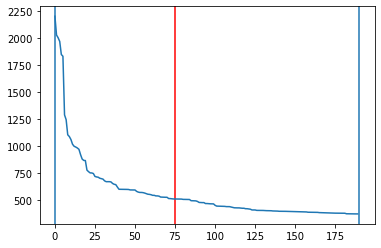

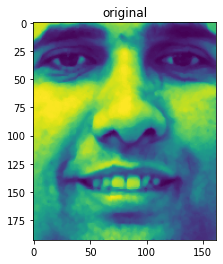

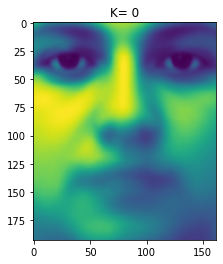

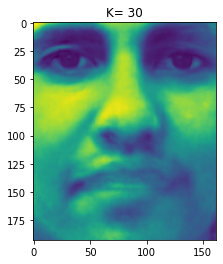

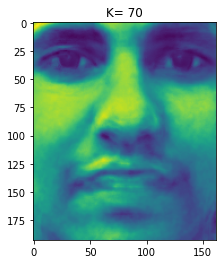

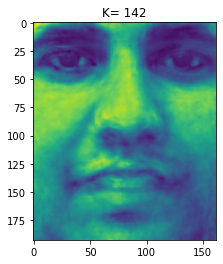

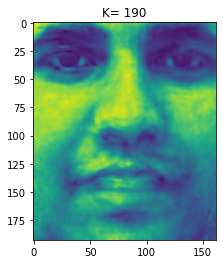

In [8]:
image = images[2*(random.randint(0,190))+1]
mses = list()
for i in range(1,191):
    recon , mse = reconstruct_image(image,U[:,:i])
    mses.append(mse)
mse_max = max(mses)
mse_min = min(mses)
K_mse = reconstruct_image(image,U[:,:K])[1]
print("mse_max: ",mse_max)
print("mse_min: ",mse_min)
print("K_mse: ",K_mse)
plt.axvline(x = K, color = 'r')
plt.axvline(x = 0)
plt.axvline(x = 190)
plt.plot(mses)

image = images[2*(random.randint(0,190))+1]
plt.figure()
plt.title("original")
plt.imshow(image)
Ks = [0,30,70,142,190]
for i in Ks:
    recon = reconstruct_image(image,U[:,:i])[0]
    plt.figure()
    plt.title("K= "+str(i))
    plt.imshow(recon)

<div dir="rtl" style="font-size:18px">
ما از ابتدا pc ها را بر اساس عکس‌های طبیعی ساختیم زیرا از همان ابتدا، $\Gamma_i$ها را از تصاویر طبیعی ساختیم. بنابراین این pcها فضای ساخته شده توسط بردارهای عکس‌های طبیعی را تشکیل می‌دهند نه بردار‌های عکس‌های خندان. همانطور که در نمودار mseها هم مشاهده می‌شود، اگرچه با انتخاب تعداد بیشتری pc، mse کم می‌شود اما کمترین مقدار آن هم حدود ۶۰۰ است در حالی که برای عکس‌های طبیعی، نزدیک به ۰ بود. همچنین در این تصاویر، حدود چشم‌ها و بینی تقریبا واضح هستند که این به علت اشتراک نسبی بین عکس‌های طبیعی و خندان در این قسمت‌ها است، اما در ناحیه دهان تصاویر تقریبا نامعلوم هستند.
<div/>

## Reconstruction of test set (10 points)


<div dir="rtl" style="font-size:18px">
تا به اینجای کار ما با محاسبه MSE و بازسازی دوباره  عکس‌ها به  شهودی عددی و بصری از دقت فضای جدید یا همان  face space خود رسیدیم. اما نمی‌توان از این نکته چشم‌پوشی کرد که ارزیابی‌های ما از فضای جدید با استفاده از عکس‌هایی انجام شده که با آنها face space را ساخته‌ایم. در نتیجه این ارزیابی ما به نوعی biased است. برای ارزیابی بهتر MSE را بر روی تعدادی عکس که الگوریتم آنها را تا به حال ندیده است انجام داده و آنها را بازسازی می‌کنیم.
    <br/>
    در این قسمت یک عکس از ۱۰ عکس دیده نشده حالت طبیعی را انتخاب نموده و کارهای بخش ب را بر روی آن پیاده کنید. ارزیابی چه تفاوتی کرده است؟ نتیجه‌گیری کنید.
    <br/>
<div/>

mse_max:  1018.3499397216619
mse_min:  195.5971046253511
K_mse:  242.85057682487917


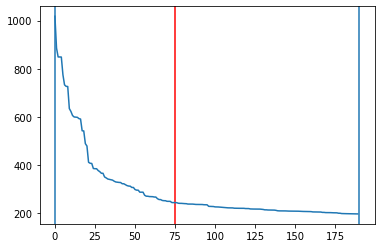

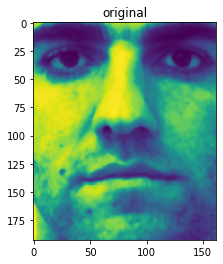

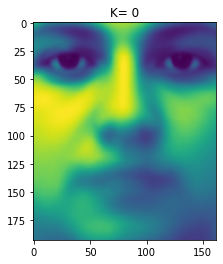

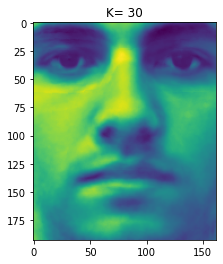

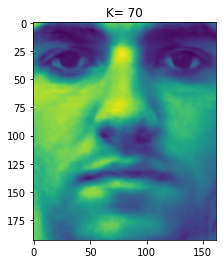

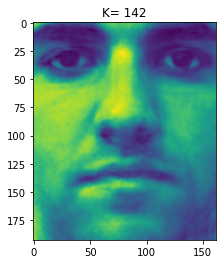

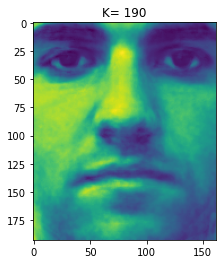

In [9]:
image = images[2*(random.randint(191,200))]
mses = list()
for i in range(1,191):
    recon , mse = reconstruct_image(image,U[:,:i])
    mses.append(mse)
mse_max = max(mses)
mse_min = min(mses)
K_mse = reconstruct_image(image,U[:,:K])[1]
print("mse_max: ",mse_max)
print("mse_min: ",mse_min)
print("K_mse: ",K_mse)
plt.axvline(x = K, color = 'r')
plt.axvline(x = 0)
plt.axvline(x = 190)
plt.plot(mses)

plt.figure()
plt.title("original")
plt.imshow(image)
Ks = [0,30,70,142,190]
for i in Ks:
    recon = reconstruct_image(image,U[:,:i])[0]
    plt.figure()
    plt.title("K= "+str(i))
    plt.imshow(recon)

<div dir="rtl" style="font-size:18px">
این بازسازی اگرچه به دقت و کیفیتی که بازسازی روی ۱۹۰ تصویر طبیعی انجام می‌شد نیست، اما حدود نسبتا خوبی از عکس را به ما می‌دهد و mse آن اگرچه به ۰ نزدیک نیست، اما کمتر از mse حاصل از پردازش تصاویر خندان است. در حالتی که ۱۹۰ pc در نظر بگیریم، به علت تعداد زیاد آن‌ها، تقریبا می‌توانیم هر تصویر مشابهی را با حدود خوبی بازسازی کنیم.
    <div/>

## Reconstruction of non-human image (10 points)

<div dir="rtl" style="font-size:18px">
دو عکس غیر از چهره انسان و به دلخواه خود )مثل عکس ماشین یا پرنده( را در نظر گرفته.
    نخست عملیات‌های لازم مثل سیاه سفید کردن یا تغییر سایز را انجام دهید.
    سپس با استفاده از تمام PCها 
    سعی بر بازسازی آن داشته باشید و MSE را محاسبه نمایید.
    <br/>
    آیا الگوریتم به اندازه عکس چهره‌ها موفق عمل کرد؟‌ چرا؟ نتیجه‌گیری کنید.
    <br/>
<div/>

parrot mse:  5394.461225646033
car mse:  2390.9413252598647


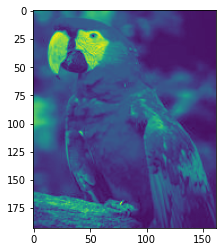

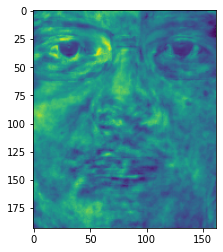

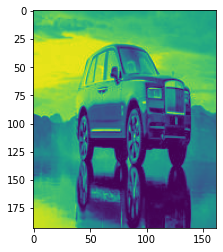

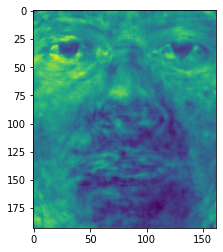

In [10]:
from PIL import Image
parrot1 = Image.open('parrot.jpeg')
parrot2 = parrot1.resize((162, 193))
parrot2.save('parrot2.jpeg')

car1 = Image.open('car.jpeg')
car2 = car1.resize((162, 193))
car2.save('car2.jpeg')

parrot = plt.imread("parrot2.jpeg")
R, G, B = parrot[:,:,0], parrot[:,:,1], parrot[:,:,2]
parrot = 0.2989 * R + 0.5870 * G + 0.1140 * B
plt.imshow(parrot)
recon , mse = reconstruct_image(parrot,U)
plt.figure()
plt.imshow(recon)
print("parrot mse: ",mse)

car = plt.imread("car2.jpeg")
R, G, B = car[:,:,0], car[:,:,1], car[:,:,2]
car = 0.2989 * R + 0.5870 * G + 0.1140 * B
plt.figure()
plt.imshow(car)
recon , mse = reconstruct_image(car,U)
plt.figure()
plt.imshow(recon)
print("car mse: ",mse)

<div dir="rtl" style="font-size:18px">
خیر. بازسازی اصلا خوب انجام نشد زیرا تصاویر اولیه‌ای که برای ساخت pcها از آن‌ها استفاده کرده بودیم تصاویر چهره انسان بودند و این تصاویر هیچ شباهتی به چهره انسان ندارند بنابراین بازسازی آن‌ها درست انجام نمی‌شود و به نظر می‌رسد فقط تیرگی و روشنایی نواحی تقریبا خوب بازسازی شده اند اما این تیرگی‌ها روی چهره انسان ساخته شده اند. mse این بازسازی ها هم از تمام mseهای قبلی با ۱۹۰ pc بیشتر است.    <div/>

## Image Rotation (10 points)

<div dir="rtl" style="font-size:18px">
    حال یکی از عکس‌های دیتاستی که تا الان روی آن کار کردیم )شامل 190 عکس طبیعی( را به صورت رندم انتخاب کنید. برای آن عکس تمام rotationهای ممکن
    )از 0 تا 360( را انجام دهید.
    حال روی هر یک از عکس‌های بدست آمده با استفاده از تمام PCها عملیات بازسازی و محاسبه‌ی MSE را انجام دهید.
    <br/>
    نمودار MSE بر حسب درجه‌ی چرخش را رسم کنید.
    <br/>
    برای 10 درجه به صورت یکنواخت بین 360 و 0، عکس اصلی، عکس بعد از دوران، عکس بازسازی‌شده به کمک الگوریتم را رسم کنید.
    <br/>
    نتایج به دست آمده را تحلیل کنید. آیا MSE در حالت 360 درجه دوران با حالت 0 برابر است؟
    چرا؟
    <br/>
    <br/>
    <font color=blue>
    با استفاده از ndimage میتوانید عکس های خود را بچرخانید.
        <font/>
        <br/>
<div/>

<Figure size 432x288 with 0 Axes>

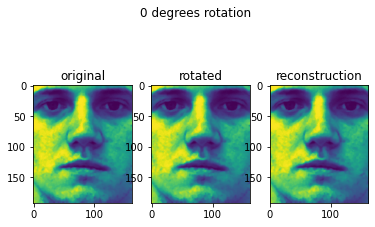

<Figure size 432x288 with 0 Axes>

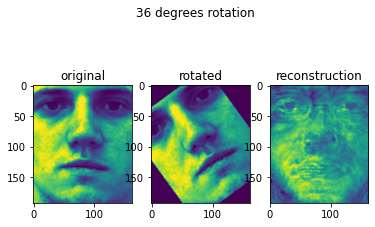

<Figure size 432x288 with 0 Axes>

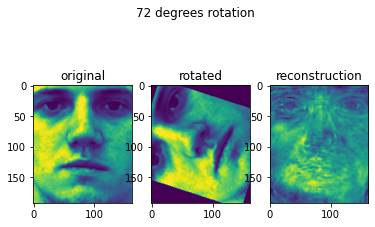

<Figure size 432x288 with 0 Axes>

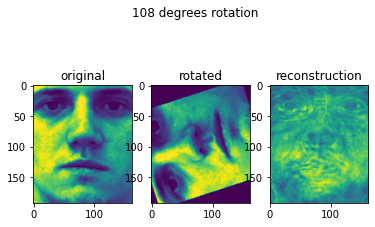

<Figure size 432x288 with 0 Axes>

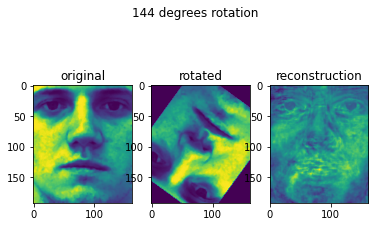

<Figure size 432x288 with 0 Axes>

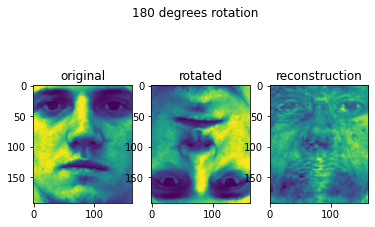

<Figure size 432x288 with 0 Axes>

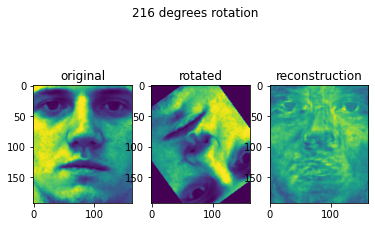

<Figure size 432x288 with 0 Axes>

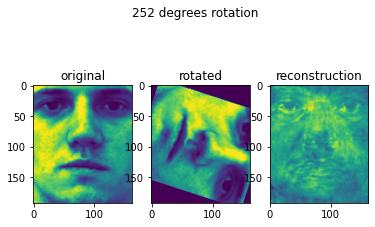

<Figure size 432x288 with 0 Axes>

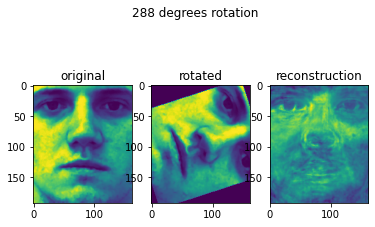

<Figure size 432x288 with 0 Axes>

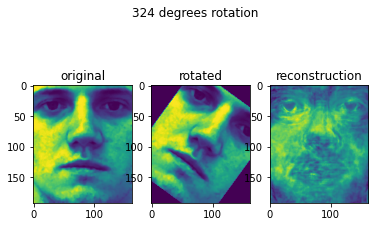

<Figure size 432x288 with 0 Axes>

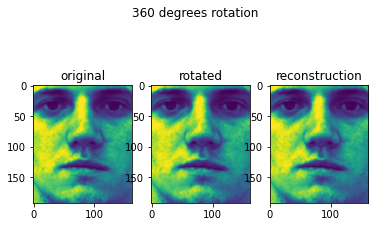

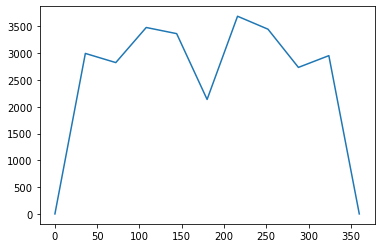

In [11]:
from scipy import ndimage
image = images[2*(random.randint(0,190))]
mses = list()
for i in range(0,361,36):
    rotated_image = ndimage.rotate(image, i, reshape=False)
    recon , mse = reconstruct_image(rotated_image,U)
    plt.figure()
    axarr = plt.subplots(1,3)[1]
    axarr[0].title.set_text('original')
    axarr[1].title.set_text('rotated')
    axarr[2].title.set_text('reconstruction')
    plt.suptitle(str(i)+" degrees rotation")
    axarr[0].imshow(image)
    axarr[1].imshow(rotated_image)
    axarr[2].imshow(recon)
    plt.show()
    mses.append(mse)
plt.figure()
plt.plot(np.arange(0,361,36),mses)


<div dir="rtl" style="font-size:18px">
همانطور که در تصاویر و نمودار مشاهده می‌شود، پس از چرخش، بازسازی انجام شده به ازای درجه چرخش‌های ۰ تا ۳۶ درجه، دقت خود را از دست می‌دهد و mse آن بالا می‌رود. همچنین پس از عبور از ۱۸۰ درجه چرخش و با نزدیک شدن به چرخش ۳۶۰ درجه‌ای، بازسازی دقیق‌تر می‌شود. همچنین در ۱۸۰ درجه، دقت به ناگهان زیاد شده و بعد دوباره کم می‌شود تا در حدود ۲۵۰ درجه به کمترین مقدار خود برسد. با دوران ۳۶۰ درجه، عملا عکس مانند حالت دوران ۰ درجه می‌شود پس mse آن با mse ۰ درجه برابر است.
    <div/>

## Face Recognition (10 point)

<div dir="rtl" style="font-size:18px">
    در این قسمت شما باید Face Recognition را تکمیل کنید. به این معنا که کد شما باید این قابلیت را داشته باشد که پس از اجرای PCA ، تصویر‌ها را پشت سر هم ورودی بگیرد ، و بعد از گرفتن هر تصویر بگوید که آیا این شخص را قبلا دیده است یا نه.
    <br/>
    برای اینکار لازم است به این صورت عمل کنید. در ابتدا 10 تا از بهترین پایه های فضا را انتخاب کنید. سپس هر تصویری که به شما داده میشود را میتوانید به صورت یک بردار 10 تایی از ضرایب نشان داد. که برای هر تصویر این ضریب منحصر به فرد میباشد. حال اگر برای 2 بردار 10 تایی خاص ، این ضرایب به اندازه کافی به هم نزدیک باشند میتوانیم بگوییم که تصویر متعلق به یک شخص میباشد.
    <br/>
<div/>

In [12]:
seen_people = list()

def is_seen(img,amount):
    U10 = U[:,:10]
    recon,mse = reconstruct_image(img,U10)
    coef = np.linalg.lstsq(U10, recon.flatten(), rcond=None)[0]
    for j in seen_people:
        if(((coef - j)**2).mean()<amount):
            seen_people.append(coef)
            return True
    seen_people.append(coef)
    return False

# Test:
print(is_seen(images[1],1e-3))
print(is_seen(images[3],1e-3))
print(is_seen(images[1],1e-3))
print(is_seen(images[0],1e-3))
print(is_seen(images[3],1e-3))
print(is_seen(images[5],1e-3))



False
False
True
False
True
False
